# Imports

In [37]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import os

In [38]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import ScalarMappable

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Data

In [39]:
# need: feldpar_df, 

In [40]:
figure_folder = '../../Figures/DataGeneration/'

os.makedirs(figure_folder, exist_ok=True)

In [41]:
data_folder = '../Data/'
df = pd.read_pickle(data_folder + "DetectorReadings.pkl")
bins = df['bins'].values
df = df.drop(columns=['bins'])
df.index = bins
exp_df = pd.read_pickle(data_folder + 'ExpirementData.pkl')

In [42]:
material_names = ['Silica', 'Kaolinite', 'Smectite', 'Montmorillonite', 'Quartz', 'Chlorite', 'Mica', 'Feldspar']
compound_names = ['SiO2', 'Al2O3', 'H2O', 'Na2O', 'Fe2O3', 'MgO', 'C']
elem_names = ['Si', 'Al', 'H', 'Na', 'O', 'Fe', 'Mg', 'C']
target_materials = ['Coconut']

In [43]:
material_exp_df = exp_df[exp_df['function'].isin(material_names)]
material_filenames = material_exp_df['filename']
material_df = df[material_filenames]

feldspar_exp_df = exp_df[exp_df['function'].str.contains("Feldspar")]
feldspar_filenames = feldspar_exp_df['filename']
feldspar_df = df[feldspar_filenames]

compound_exp_df = exp_df[exp_df['function'].isin(compound_names)]
compound_filenames = compound_exp_df['filename']
compound_df = df[compound_filenames]

element_exp_df = exp_df[exp_df['function'].isin(elem_names)]
element_filenames = element_exp_df['filename']
element_df = df[element_filenames]

target_exp_df = exp_df[exp_df['function'].isin(target_materials)]
target_filenames = target_exp_df['filename']
target_df = df[target_filenames]

# Plots 1

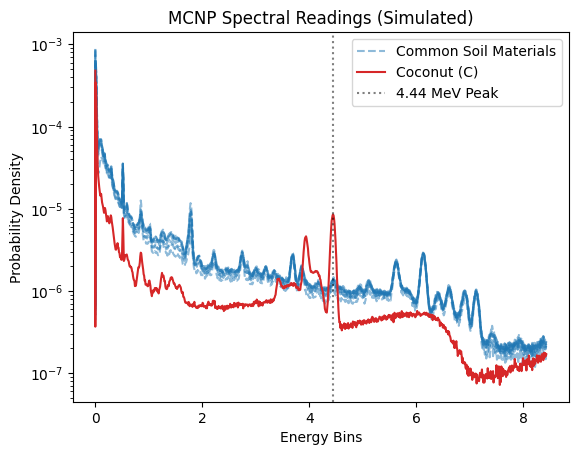

In [44]:
# Example Spectral Reading
plt.figure()
# plt.plot(element_df.index, element_df.values, alpha=0.5, linestyle=':', color='tab:red')
# plt.plot(compound_df.index, compound_df.values, alpha=0.5, linestyle='dashdot', color='tab:blue')
plt.plot(material_df.index, material_df.values, alpha=0.5, linestyle='dashed', color='tab:blue')
plt.plot(target_df.index, target_df.values, alpha=1, linestyle='solid', color='tab:red')
plt.axvline(x=4.44, color='black', linestyle='dotted', alpha=0.5)
# make a legend with the names of the materials
custom_lines = [
    # Line2D([0], [0], color='tab:red', linestyle=':', alpha=0.5),
    # Line2D([0], [0], color='tab:blue', linestyle='dashdot', alpha=0.5),
    Line2D([0], [0], color='tab:blue', linestyle='dashed', alpha=0.5),
    Line2D([0], [0], color='tab:red', linestyle='solid', alpha=1),
    Line2D([0], [0], color='black', linestyle='dotted', alpha=0.5),
]
plt.legend(custom_lines, ['Common Soil Materials', 'Coconut (C)', '4.44 MeV Peak'], loc='upper right')
plt.xlabel('Energy Bins')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.title('MCNP Spectral Readings (Simulated)')
plt.savefig(figure_folder + 'MCNPSpectralReading.png', bbox_inches='tight')
plt.show()

In [45]:
natural_carbon, high_carbon = 0.06, 1.0
carbon_portions = feldspar_exp_df['avg_carbon_portion'].values
colors = plt.cm.jet(np.linspace(0, 1, len(carbon_portions)))
feldspar_exp_df['color'] = colors.tolist()
feldspar_exp_df['carbon level'] = feldspar_exp_df['avg_carbon_portion'].apply(
    lambda x: 'Natural' if x <= natural_carbon else ('High' if x > natural_carbon else 'Intermediate'))

/tmp/ipykernel_266511/2445856533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feldspar_exp_df['color'] = colors.tolist()
/tmp/ipykernel_266511/2445856533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feldspar_exp_df['carbon level'] = feldspar_exp_df['avg_carbon_portion'].apply(


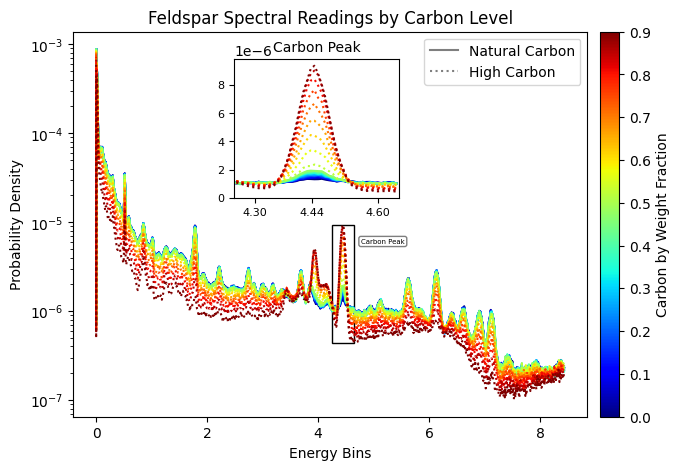

In [46]:
# Plotting Feldspar Spectral Readings by Carbon Level with Floating Subplot (4-5 MeV)

fig, ax = plt.subplots(figsize=(8, 5))
norm = Normalize(vmin=feldspar_exp_df['avg_carbon_portion'].min(), vmax=feldspar_exp_df['avg_carbon_portion'].max())
sm = ScalarMappable(cmap=plt.cm.jet, norm=norm)
sm.set_array([])

for i, row in feldspar_exp_df.iterrows():
    linestyle = 'solid' if row['avg_carbon_portion'] <= natural_carbon else 'dotted'
    ax.plot(
        feldspar_df.index,
        feldspar_df[row.filename],
        color=row['color'],
        linestyle=linestyle,
    )

custom_lines = [
    Line2D([0], [0], color='black', linestyle='solid', alpha=0.5),
    Line2D([0], [0], color='black', linestyle='dotted', alpha=0.5),
]
ax.legend(custom_lines, ['Natural Carbon', 'High Carbon'], loc='upper right')
ax.set_xlabel('Energy Bins')
ax.set_ylabel('Probability Density')
ax.set_yscale('log')
ax.set_title('Feldspar Spectral Readings by Carbon Level')
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Carbon by Weight Fraction')

# Floating subplot for 4-5 MeV

axins = inset_axes(ax, width="80%", height="80%", loc='lower left', bbox_to_anchor=(0.3, 0.55, 0.4, 0.45), bbox_transform=ax.transAxes)
for i, row in feldspar_exp_df.iterrows():
    linestyle = 'solid' if row['avg_carbon_portion'] <= natural_carbon else 'dotted'
    # Mask for 4-5 MeV
    mask = (feldspar_df.index >= 4.25) & (feldspar_df.index <= 4.65)
    axins.plot(
        feldspar_df.index[mask],
        feldspar_df[row.filename][mask],
        color=row['color'],
        linestyle=linestyle,
    )
axins.set_xlim(4.25, 4.65)
# axins.set_yscale('log')
axins.set_xticks([4.3, 4.44, 4.6])
axins.set_title('Carbon Peak', fontsize=10)
axins.tick_params(axis='both', which='major', labelsize=8)


rect = Rectangle((4.25, feldspar_df[row.filename][mask].min()),
                 0.4, feldspar_df[row.filename][mask].max() - feldspar_df[row.filename][mask].min(),
                 linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# add text annotation for the inset
ax.text(.56, 0.45, 'Carbon Peak', transform=ax.transAxes, fontsize=5, color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'))
fig.savefig(figure_folder + 'FeldsparSpectralReadingByCarbonLevel.png', bbox_inches='tight')
plt.show()

# Convolution

In [47]:
def lin_conv(specs, coeffs):
    """
    Linear convolution of spectra with coefficients.
    """
    specs_arr = np.stack(specs, axis=0)
    coeffs_arr = np.array(coeffs).reshape((-1,) + (1,) * (specs_arr.ndim - 1))
    return np.sum(specs_arr * coeffs_arr, axis=0)

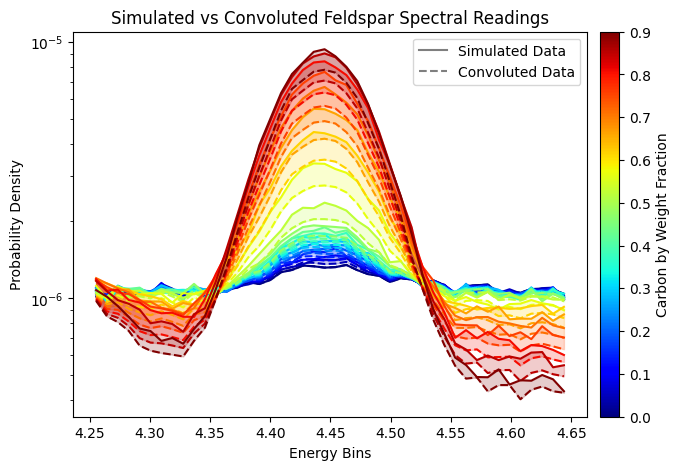

In [48]:
feldspar_spectrum = feldspar_df['7x7x7_Feldspar_001021']
max_carbon_spectrum = target_df['7x7x7_Coconut_001022']
max_natural_carbon_spectrum = feldspar_df['7x7x7_C_0600_Feldspar_Fill_003142']
carbon_levels = feldspar_exp_df['avg_carbon_portion']
lin_conv_spectrums = [
    lin_conv(
        [feldspar_df['7x7x7_Feldspar_001021'], target_df['7x7x7_Coconut_001022']], 
        [(1-carbon_level), 
            carbon_level]
            ) for carbon_level in carbon_levels
]

lin_conv_spectrums = np.array(lin_conv_spectrums)
# Filter the data between 4.25 and 4.65 MeV before plotting
mask = (feldspar_df.index >= 4.25) & (feldspar_df.index <= 4.65)
plt.figure(figsize=(8, 5))
for i, (lin_spec, carbon_level) in enumerate(zip(lin_conv_spectrums, carbon_levels)):
    color = feldspar_exp_df['color'].iloc[i]
    linestyle_sim = 'solid'
    linestyle_conv = 'dashed'
    # Plot simulated Feldspar spectrum
    plt.plot(feldspar_df.index[mask], feldspar_df.iloc[:, i][mask], color=color, linestyle=linestyle_sim, alpha=1)
    # Plot convoluted spectrum
    plt.plot(feldspar_df.index[mask], lin_spec[mask], color=color, linestyle=linestyle_conv, alpha=1)
    # Fill between
    plt.fill_between(feldspar_df.index[mask], feldspar_df.iloc[:, i][mask], lin_spec[mask], color=color, alpha=.2)

custom_lines = [
    Line2D([0], [0], color='black', linestyle='solid', alpha=0.5),
    Line2D([0], [0], color='black', linestyle='dashed', alpha=0.5),
]
plt.legend(custom_lines, ['Simulated Data', 'Convoluted Data'], loc='upper right')

sm = ScalarMappable(cmap=plt.cm.jet, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.02)
cbar.set_label('Carbon by Weight Fraction')

plt.xlabel('Energy Bins')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.title('Simulated vs Convoluted Feldspar Spectral Readings')
# plt.savefig(figure_folder + 'Sim_vs_Convoluted_FeldsparSpectralReadings.png', bbox_inches='tight')
plt.show()

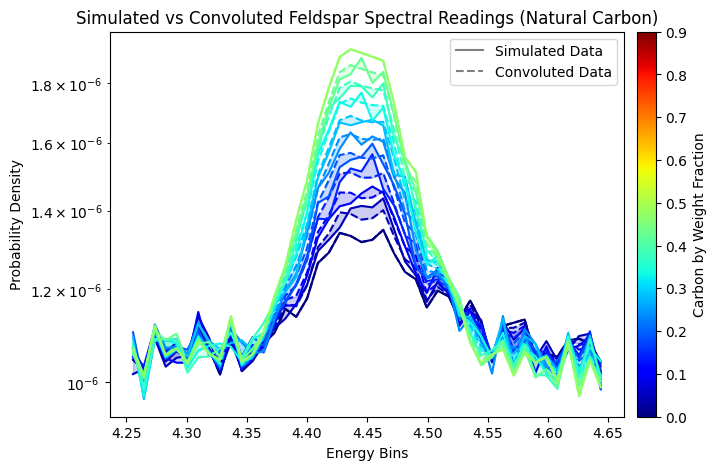

In [49]:
# do the same as above but for only natural carbon levels

feldspar_spectrum = feldspar_df['7x7x7_Feldspar_001021']
max_carbon_spectrum = target_df['7x7x7_Coconut_001022']
max_natural_carbon_spectrum = feldspar_df['7x7x7_C_0600_Feldspar_Fill_003142']
carbon_levels = feldspar_exp_df['avg_carbon_portion']
lin_conv_spectrums = [
    lin_conv(
        [feldspar_df['7x7x7_Feldspar_001021'], max_natural_carbon_spectrum], 
        [(1-carbon_level), 
            carbon_level]
            ) for carbon_level in carbon_levels/.06
]

plt.figure(figsize=(8, 5))
for i, (lin_spec, carbon_level) in enumerate(zip(lin_conv_spectrums, carbon_levels)):
    if carbon_level <= natural_carbon:
        color = feldspar_exp_df['color'].iloc[i]
        linestyle_sim = 'solid'
        linestyle_conv = 'dashed'
        # Plot simulated Feldspar spectrum
        plt.plot(feldspar_df.index[mask], feldspar_df.iloc[:, i][mask], color=color, linestyle=linestyle_sim, alpha=1)
        # Plot convoluted spectrum
        plt.plot(feldspar_df.index[mask], lin_spec[mask], color=color, linestyle=linestyle_conv, alpha=1)
        # Fill between
        plt.fill_between(feldspar_df.index[mask], feldspar_df.iloc[:, i][mask], lin_spec[mask], color=color, alpha=.2)
custom_lines = [
    Line2D([0], [0], color='black', linestyle='solid', alpha=0.5),
    Line2D([0], [0], color='black', linestyle='dashed', alpha=0.5),
]
plt.legend(custom_lines, ['Simulated Data', 'Convoluted Data'], loc='upper right')
sm = ScalarMappable(cmap=plt.cm.jet, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.02)
cbar.set_label('Carbon by Weight Fraction')
plt.xlabel('Energy Bins')
plt.ylabel('Probability Density')
plt.yscale('log')
plt.title('Simulated vs Convoluted Feldspar Spectral Readings (Natural Carbon)')
# plt.savefig(figure_folder + 'Sim_vs_Convoluted_FeldsparSpectralReadings_NaturalCarbon.png', bbox_inches='tight')
plt.show()

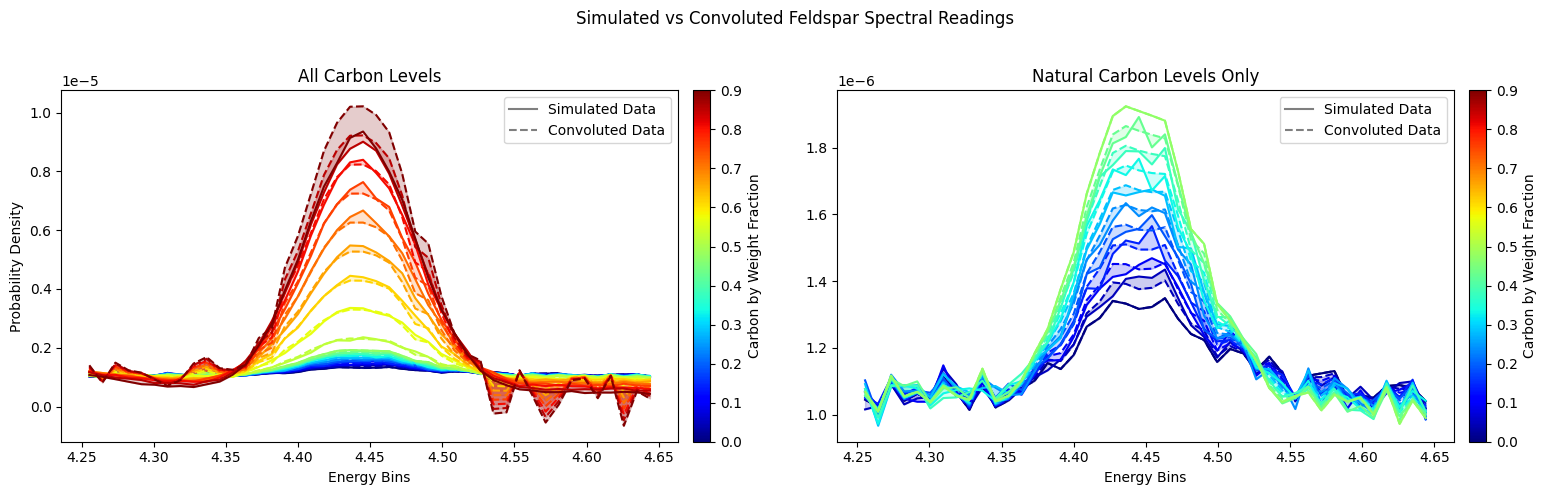

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# First subplot: Simulated vs Convoluted Feldspar Spectral Readings (all carbon levels)



ax = axes[0]
for i, (lin_spec, carbon_level) in enumerate(zip(lin_conv_spectrums, carbon_levels)):
    color = feldspar_exp_df['color'].iloc[i]
    ax.plot(feldspar_df.index[mask], feldspar_df.iloc[:, i][mask], color=color, linestyle='solid', alpha=1)
    ax.plot(feldspar_df.index[mask], lin_spec[mask], color=color, linestyle='dashed', alpha=1)
    ax.fill_between(feldspar_df.index[mask], feldspar_df.iloc[:, i][mask], lin_spec[mask], color=color, alpha=.2)
custom_lines = [
    Line2D([0], [0], color='black', linestyle='solid', alpha=0.5),
    Line2D([0], [0], color='black', linestyle='dashed', alpha=0.5),
]
ax.legend(custom_lines, ['Simulated Data', 'Convoluted Data'], loc='upper right')
ax.set_xlabel('Energy Bins')
ax.set_ylabel('Probability Density')
# ax.set_yscale('log')
ax.set_title('All Carbon Levels')

sm = ScalarMappable(cmap=plt.cm.jet, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Carbon by Weight Fraction')

# Second subplot: Only natural carbon levels
ax2 = axes[1]
for i, (lin_spec, carbon_level) in enumerate(zip(lin_conv_spectrums, carbon_levels)):
    if carbon_level <= natural_carbon:
        color = feldspar_exp_df['color'].iloc[i]
        ax2.plot(feldspar_df.index[mask], feldspar_df.iloc[:, i][mask], color=color, linestyle='solid', alpha=1)
        ax2.plot(feldspar_df.index[mask], lin_spec[mask], color=color, linestyle='dashed', alpha=1)
        ax2.fill_between(feldspar_df.index[mask], feldspar_df.iloc[:, i][mask], lin_spec[mask], color=color, alpha=.2)
ax2.legend(custom_lines, ['Simulated Data', 'Convoluted Data'], loc='upper right')
ax2.set_xlabel('Energy Bins')
ax2.set_title('Natural Carbon Levels Only')
# ax2.set_yscale('log')

sm2 = ScalarMappable(cmap=plt.cm.jet, norm=norm)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2, pad=0.02)
cbar2.set_label('Carbon by Weight Fraction')

plt.suptitle('Simulated vs Convoluted Feldspar Spectral Readings')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(figure_folder + 'Sim_vs_Convoluted_FeldsparSpectralReadings_Combined.png', bbox_inches='tight')
plt.show()


In [51]:
feldspar_spectrum = feldspar_df['7x7x7_Feldspar_001021']
max_carbon_spectrum = target_df['7x7x7_Coconut_001022']
max_natural_carbon_spectrum = feldspar_df['7x7x7_C_0600_Feldspar_Fill_003142']
carbon_levels = np.array(list(feldspar_exp_df['avg_carbon_portion'] )+[1])
lin_conv_spectrums = [
    lin_conv(
        [feldspar_df['7x7x7_Feldspar_001021'], max_natural_carbon_spectrum], 
        [(1-carbon_level), 
            carbon_level]
            ) for carbon_level in carbon_levels/.06
]

In [52]:
carbon_levels/.06

array([ 0.        ,  0.1       ,  0.2       ,  0.3       ,  0.4       ,
        0.5       ,  0.6       ,  0.7       ,  0.8       ,  0.9       ,
        1.        ,  1.66666667,  3.33333333,  5.        ,  6.66666667,
        8.33333333, 10.        , 11.66666667, 13.33333333, 15.        ,
       16.66666667])

In [53]:
# for every material, we need to generate the linear convolution spectrums, save them to a dataframe
conv_spectrums_df = pd.DataFrame()
conv_spectrums_exp_df = {}
_finames = []
_cl = []
_elem_maps = []
for material in material_names:
    material_exp_df = exp_df[exp_df['function'].str.contains(material)]
    material_filenames = material_exp_df['filename']
    material_df = df[material_filenames]

    base_material_exp_df = material_exp_df[material_exp_df['avg_carbon_portion']==0]
    base_material_filename = base_material_exp_df.filename.values
    base_material_spectrum = material_df[base_material_filename].values.flatten()
    # print(base_material_exp_df['elem_maps'].values[0])
    
    target_exp_df = material_exp_df[(material_exp_df['avg_carbon_portion']>0.059) & (material_exp_df['avg_carbon_portion']<0.061)]
    target_filename = target_exp_df.filename.values
    target_materials_spectrum = material_df[target_filename].values.flatten()
    # print(target_exp_df['elem_maps'].values[0])

    lin_conv_spectrums = [
        lin_conv(
            [base_material_spectrum, target_materials_spectrum], 
            [(1-carbon_level), 
                carbon_level]
                ) for carbon_level in carbon_levels/.06
    ]
    lin_conv_elem_maps = [
        lin_conv(
            [base_material_exp_df['elem_maps'].values[0], target_exp_df['elem_maps'].values[0]], 
            [(1-carbon_level), 
                carbon_level]
                ) for carbon_level in carbon_levels/.06
    ]
    # make each lin_conv_elem_maps nonzero and normalized
    lin_conv_elem_maps = [np.abs(elem_map) / np.linalg.norm(elem_map) for elem_map in lin_conv_elem_maps]
    # print(lin_conv_elem_maps)
    
    carbon_level_strings = [f"{str(carbon_level)[2:]}" for carbon_level in carbon_levels]
    # if any carbon level is 1, do "max carbon instead"
    if 1 in carbon_levels:
        carbon_level_strings[list(carbon_levels).index(1)] = 'max_carbon'

    filenames = [f"lin_conv_{material}_C{carbon_level_string}" for carbon_level_string in carbon_level_strings]
    for i, (lin_spec, elem_maps, carbon_level_string, carbon_level) in enumerate(zip(lin_conv_spectrums, lin_conv_elem_maps, carbon_level_strings, carbon_levels)):
        conv_spectrums_df[f"lin_conv_{material}_C{carbon_level_string}"] = lin_spec
        _finames.append(filenames[i])
        _cl.append(carbon_level)
        _elem_maps.append(elem_maps)

    # interupt
    # raise Exception("interupt for testing")

conv_spectrums_df.index = bins
conv_spectrums_exp_df['filename'] = _finames
conv_spectrums_exp_df['avg_carbon_portion'] = _cl
conv_spectrums_exp_df['elem_maps'] = _elem_maps
conv_spectrums_exp_df = pd.DataFrame(conv_spectrums_exp_df)

/tmp/ipykernel_266511/1073067242.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  conv_spectrums_df[f"lin_conv_{material}_C{carbon_level_string}"] = lin_spec
/tmp/ipykernel_266511/1073067242.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  conv_spectrums_df[f"lin_conv_{material}_C{carbon_level_string}"] = lin_spec
/tmp/ipykernel_266511/1073067242.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

In [54]:
conv_spectrums_df

,lin_conv_Silica_C0,lin_conv_Silica_C005999999999999998,lin_conv_Silica_C011999999999999997,lin_conv_Silica_C017999999999999867,lin_conv_Silica_C023999999999999994,lin_conv_Silica_C02999999999999992,lin_conv_Silica_C035999999999999734,lin_conv_Silica_C04199999999999984,lin_conv_Silica_C04799999999999999,lin_conv_Silica_C05399999999999993,...,lin_conv_Feldspar_C10000000000000063,lin_conv_Feldspar_C20000000000000126,lin_conv_Feldspar_C2999999999999982,lin_conv_Feldspar_C4000000000000025,lin_conv_Feldspar_C5,lin_conv_Feldspar_C5999999999999964,lin_conv_Feldspar_C6999999999999957,lin_conv_Feldspar_C800000000000005,lin_conv_Feldspar_C8999999999999994,lin_conv_Feldspar_Cmax_carbon
0.000000,8.620730e-04,8.624786e-04,8.628842e-04,8.632898e-04,8.636954e-04,8.641010e-04,8.645066e-04,8.649122e-04,8.653178e-04,8.657234e-04,...,8.645113e-04,8.487147e-04,8.329180e-04,8.171213e-04,8.013247e-04,7.855280e-04,7.697313e-04,7.539347e-04,7.381380e-04,7.223413e-04
0.000010,7.150000e-07,7.123000e-07,7.096000e-07,7.069000e-07,7.042000e-07,7.015000e-07,6.988000e-07,6.961000e-07,6.934000e-07,6.907000e-07,...,7.156667e-07,6.873333e-07,6.590000e-07,6.306667e-07,6.023333e-07,5.740000e-07,5.456667e-07,5.173333e-07,4.890000e-07,4.606667e-07
0.009045,6.092360e-04,6.096202e-04,6.100044e-04,6.103886e-04,6.107728e-04,6.111570e-04,6.115412e-04,6.119254e-04,6.123096e-04,6.126938e-04,...,6.136000e-04,6.042100e-04,5.948200e-04,5.854300e-04,5.760400e-04,5.666500e-04,5.572600e-04,5.478700e-04,5.384800e-04,5.290900e-04
0.018080,4.217290e-04,4.221308e-04,4.225326e-04,4.229344e-04,4.233362e-04,4.237380e-04,4.241398e-04,4.245416e-04,4.249434e-04,4.253452e-04,...,4.275917e-04,4.219933e-04,4.163950e-04,4.107967e-04,4.051983e-04,3.996000e-04,3.940017e-04,3.884033e-04,3.828050e-04,3.772067e-04
0.027114,2.007370e-04,2.009445e-04,2.011520e-04,2.013595e-04,2.015670e-04,2.017745e-04,2.019820e-04,2.021895e-04,2.023970e-04,2.026045e-04,...,2.051397e-04,2.039713e-04,2.028030e-04,2.016347e-04,2.004663e-04,1.992980e-04,1.981297e-04,1.969613e-04,1.957930e-04,1.946247e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.393360,2.530000e-07,2.499000e-07,2.468000e-07,2.437000e-07,2.406000e-07,2.375000e-07,2.344000e-07,2.313000e-07,2.282000e-07,2.251000e-07,...,2.436667e-07,2.503333e-07,2.570000e-07,2.636667e-07,2.703333e-07,2.770000e-07,2.836667e-07,2.903333e-07,2.970000e-07,3.036667e-07
8.402400,2.580000e-07,2.554000e-07,2.528000e-07,2.502000e-07,2.476000e-07,2.450000e-07,2.424000e-07,2.398000e-07,2.372000e-07,2.346000e-07,...,2.230000e-07,2.030000e-07,1.830000e-07,1.630000e-07,1.430000e-07,1.230000e-07,1.030000e-07,8.300000e-08,6.300000e-08,4.300000e-08
8.411430,2.520000e-07,2.528000e-07,2.536000e-07,2.544000e-07,2.552000e-07,2.560000e-07,2.568000e-07,2.576000e-07,2.584000e-07,2.592000e-07,...,2.753333e-07,3.136667e-07,3.520000e-07,3.903333e-07,4.286667e-07,4.670000e-07,5.053333e-07,5.436667e-07,5.820000e-07,6.203333e-07
8.420470,2.270000e-07,2.275000e-07,2.280000e-07,2.285000e-07,2.290000e-07,2.295000e-07,2.300000e-07,2.305000e-07,2.310000e-07,2.315000e-07,...,2.403333e-07,2.686667e-07,2.970000e-07,3.253333e-07,3.536667e-07,3.820000e-07,4.103333e-07,4.386667e-07,4.670000e-07,4.953333e-07


In [55]:
# save conv_spectrums_df and conv_spectrums_exp_df to pickle files
conv_spectrums_df.to_pickle('ConvolutionData.pkl')
conv_spectrums_exp_df.to_pickle('ConvolutionExpData.pkl')